In [88]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Data analysis and pre-processing

In [89]:
 df = pd.read_csv('archive (4)\globalterrorismdb_0718dist.csv', encoding = 'ISO-8859-1')

C:\Users\Marwan Fayad\AppData\Roaming\Python\Python37\site-packages\IPython\core\interactiveshell.py:3258: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [171]:
df

,iyear,imonth,iday,latitude,longitude,success,suicide,attacktype1
0,1970,7,2,18.456792,-69.951164,1,0,1
1,1970,0,0,19.371887,-99.086624,1,0,6
2,1970,1,0,15.478598,120.599741,1,0,1
3,1970,1,0,37.997490,23.762728,1,0,3
4,1970,1,0,33.580412,130.396361,1,0,7
...,...,...,...,...,...,...,...,...
181686,2017,12,31,2.359673,45.385034,1,0,2
181687,2017,12,31,35.407278,35.942679,1,0,3
181688,2017,12,31,6.900742,124.437908,1,0,7
181689,2017,12,31,24.798346,93.940430,0,0,3


In [91]:
# Information on dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Columns: 135 entries, eventid to related
dtypes: float64(55), int64(22), object(58)
memory usage: 187.1+ MB


In [92]:
df.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

In [93]:
df.describe()

,eventid,iyear,imonth,iday,extended,country,region,latitude,longitude,specificity,...,ransomamt,ransomamtus,ransompaid,ransompaidus,hostkidoutcome,nreleased,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
count,1.816910e+05,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,177135.000000,1.771340e+05,181685.000000,...,1.350000e+03,5.630000e+02,7.740000e+02,552.000000,10991.000000,10400.000000,181691.000000,181691.000000,181691.000000,181691.000000
mean,2.002705e+11,2002.638997,6.467277,15.505644,0.045346,131.968501,7.160938,23.498343,-4.586957e+02,1.451452,...,3.172530e+06,5.784865e+05,7.179437e+05,240.378623,4.629242,-29.018269,-4.543731,-4.464398,0.090010,-3.945952
std,1.325957e+09,13.259430,3.388303,8.814045,0.208063,112.414535,2.933408,18.569242,2.047790e+05,0.995430,...,3.021157e+07,7.077924e+06,1.014392e+07,2940.967293,2.035360,65.720119,4.543547,4.637152,0.568457,4.691325
min,1.970000e+11,1970.000000,0.000000,0.000000,0.000000,4.000000,1.000000,-53.154613,-8.618590e+07,1.000000,...,-9.900000e+01,-9.900000e+01,-9.900000e+01,-99.000000,1.000000,-99.000000,-9.000000,-9.000000,-9.000000,-9.000000
25%,1.991021e+11,1991.000000,4.000000,8.000000,0.000000,78.000000,5.000000,11.510046,4.545640e+00,1.000000,...,0.000000e+00,0.000000e+00,-9.900000e+01,0.000000,2.000000,-99.000000,-9.000000,-9.000000,0.000000,-9.000000
50%,2.009022e+11,2009.000000,6.000000,15.000000,0.000000,98.000000,6.000000,31.467463,4.324651e+01,1.000000,...,1.500000e+04,0.000000e+00,0.000000e+00,0.000000,4.000000,0.000000,-9.000000,-9.000000,0.000000,0.000000
75%,2.014081e+11,2014.000000,9.000000,23.000000,0.000000,160.000000,10.000000,34.685087,6.871033e+01,1.000000,...,4.000000e+05,0.000000e+00,1.273412e+03,0.000000,7.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,2.017123e+11,2017.000000,12.000000,31.000000,1.000000,1004.000000,12.000000,74.633553,1.793667e+02,5.000000,...,1.000000e+09,1.320000e+08,2.750000e+08,48000.000000,7.000000,2769.000000,1.000000,1.000000,1.000000,1.000000


In [94]:
# Checking for null values
df.isnull().sum()

eventid            0
iyear              0
imonth             0
iday               0
approxdate    172452
               ...  
INT_LOG            0
INT_IDEO           0
INT_MISC           0
INT_ANY            0
related       156653
Length: 135, dtype: int64

In [95]:
df.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [96]:
import pandas as pd
import numpy as np

data = pd.read_csv('archive (4)\globalterrorismdb_0718dist.csv', encoding = 'ISO-8859-1')

data.replace([np.inf, -np.inf], np.nan, inplace=True)

data.dropna(inplace=True)

numeric_columns = data.select_dtypes(include=[np.number]).columns
large_value_threshold = 1e10  

for column in numeric_columns:
    data = data[data[column] <= large_value_threshold]


data.to_csv('cleaned_terrorism.csv', index=False)


C:\Users\Marwan Fayad\AppData\Roaming\Python\Python37\site-packages\IPython\core\interactiveshell.py:3258: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [140]:
pd.set_option('display.max_rows', 1000); 
data.nunique()

iyear             0
imonth            0
iday              0
extended          0
country           0
region            0
latitude          0
longitude         0
specificity       0
vicinity          0
crit1             0
crit2             0
crit3             0
doubtterr         0
alternative       0
multiple          0
success           0
suicide           0
attacktype1       0
attacktype2       0
attacktype3       0
targtype1         0
targsubtype1      0
natlty1           0
targtype2         0
targsubtype2      0
natlty2           0
targtype3         0
targsubtype3      0
natlty3           0
guncertain1       0
guncertain2       0
guncertain3       0
individual        0
nperps            0
nperpcap          0
claimed           0
claimmode         0
claim2            0
claimmode2        0
claim3            0
claimmode3        0
compclaim         0
weaptype1         0
weapsubtype1      0
weaptype2         0
weapsubtype2      0
weaptype3         0
weapsubtype3      0
weaptype4         0


In [97]:
df.isnull().sum()

eventid            0
iyear              0
imonth             0
iday               0
approxdate    172452
               ...  
INT_LOG            0
INT_IDEO           0
INT_MISC           0
INT_ANY            0
related       156653
Length: 135, dtype: int64

In [141]:
data.isnull().any()

iyear             False
imonth            False
iday              False
extended          False
country           False
region            False
latitude          False
longitude         False
specificity       False
vicinity          False
crit1             False
crit2             False
crit3             False
doubtterr         False
alternative       False
multiple          False
success           False
suicide           False
attacktype1       False
attacktype2       False
attacktype3       False
targtype1         False
targsubtype1      False
natlty1           False
targtype2         False
targsubtype2      False
natlty2           False
targtype3         False
targsubtype3      False
natlty3           False
guncertain1       False
guncertain2       False
guncertain3       False
individual        False
nperps            False
nperpcap          False
claimed           False
claimmode         False
claim2            False
claimmode2        False
claim3            False
claimmode3      

In [116]:
data_columns = [
    
    'eventid',
    
    
                'iyear', 'imonth', 'iday', 'latitude', 'longitude',
    
  
                'extended',
                'vicinity', 
                'crit1', 'crit2', 'crit3', 
                'doubtterr', 
                'multiple',
                'success', 
                'suicide', 
                'claimed', 
                'property', 
                'ishostkid', 
    
    
                'nkill', 
                'nwound',
    
   
                'country_txt', 
                'region', 
                'region_txt', 
                'attacktype1_txt', 
                'targtype1_txt', 
                'natlty1_txt', 
                'weaptype1_txt', 
    
    
                'target1', 
                'gname', 
                'summary', 
    
]

In [117]:
data = data.loc[:, data_columns] 


data = data[(data.crit1 == 1) & (data.crit2 == 1) & (data.crit3 == 1) & (data.doubtterr == 0)]

data.weaptype1_txt.replace(
    'Vehicle (not to include vehicle-borne explosives, i.e., car or truck bombs)',
    'Vehicle', inplace = True)


data.iloc[:,[6, 15, 16, 17]] = data.iloc[:,[6, 15, 16, 17]].replace(-9,0)

data.claimed.replace(2,1, inplace = True)

data.target1 = data.target1.str.lower()
data.gname = data.gname.str.lower()
data.summary = data.summary.str.lower()    
data.target1 = data.target1.fillna('unknown').replace('unk','unknown')


data.nkill = np.round(data.nkill.fillna(data.nkill.median())).astype(int) 
data.nwound = np.round(data.nwound.fillna(data.nwound.median())).astype(int) 


data['ncasualties'] = data['nkill'] + data['nwound']
data['has_casualties'] = data['ncasualties'].apply(lambda x: 0 if x == 0 else 1)

print("Data cleaned and prepared.")

Data cleaned and prepared.


In [99]:
year_attacks = df.groupby('iyear').size().reset_index(name='count')

## Data Visualization

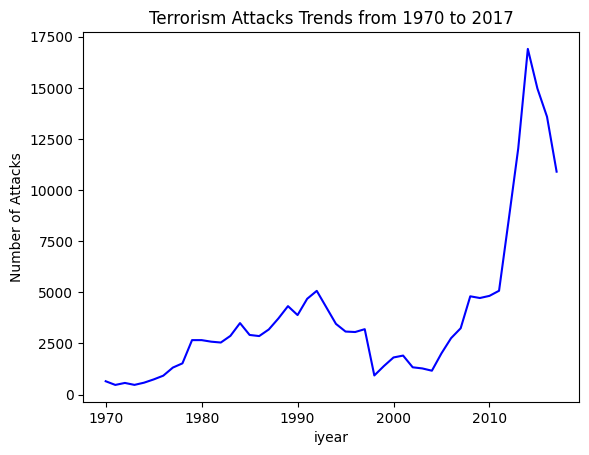

In [101]:
sns.lineplot(x='iyear', y='count', data=year_attacks, color='blue')
plt.xlabel('iyear')
plt.ylabel('Number of Attacks')
plt.title("Terrorism Attacks Trends from 1970 to 2017")
plt.show()

In [102]:
year_attacks_region = df.groupby(['iyear','region']).size().reset_index(name='count')

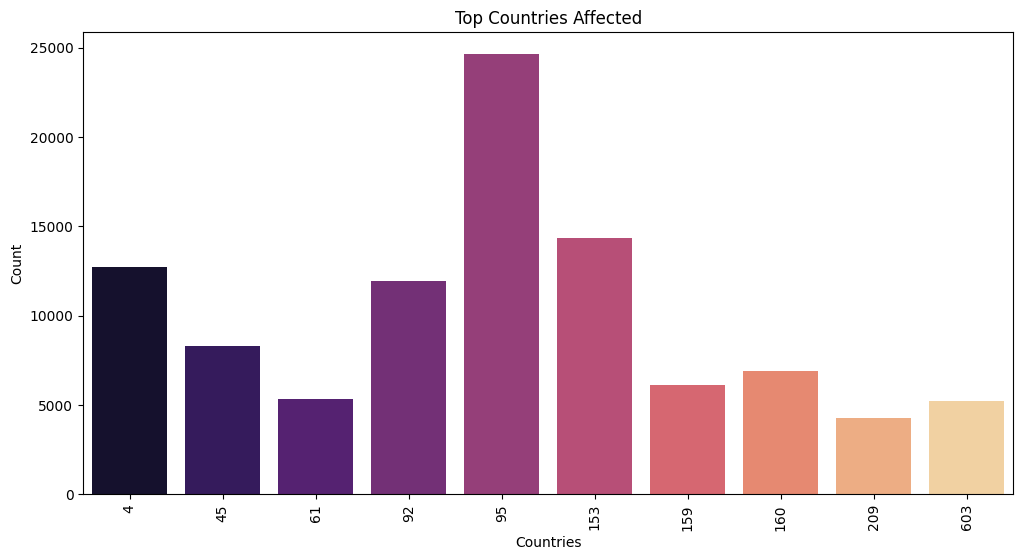

In [103]:
plt.subplots(figsize=(12,6))
top=df['country'].value_counts()[:10].to_frame().reset_index()
top.columns= ['country','Attacks_Counts']
sns.barplot(x='country',y='Attacks_Counts', data= top, palette='magma')
plt.title('Top Countries Affected')
plt.xlabel('Countries')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

From the graph we can see the most affected country with terrorism are:

Iraq
India
Pakistan
Afghanistan
Phillipines

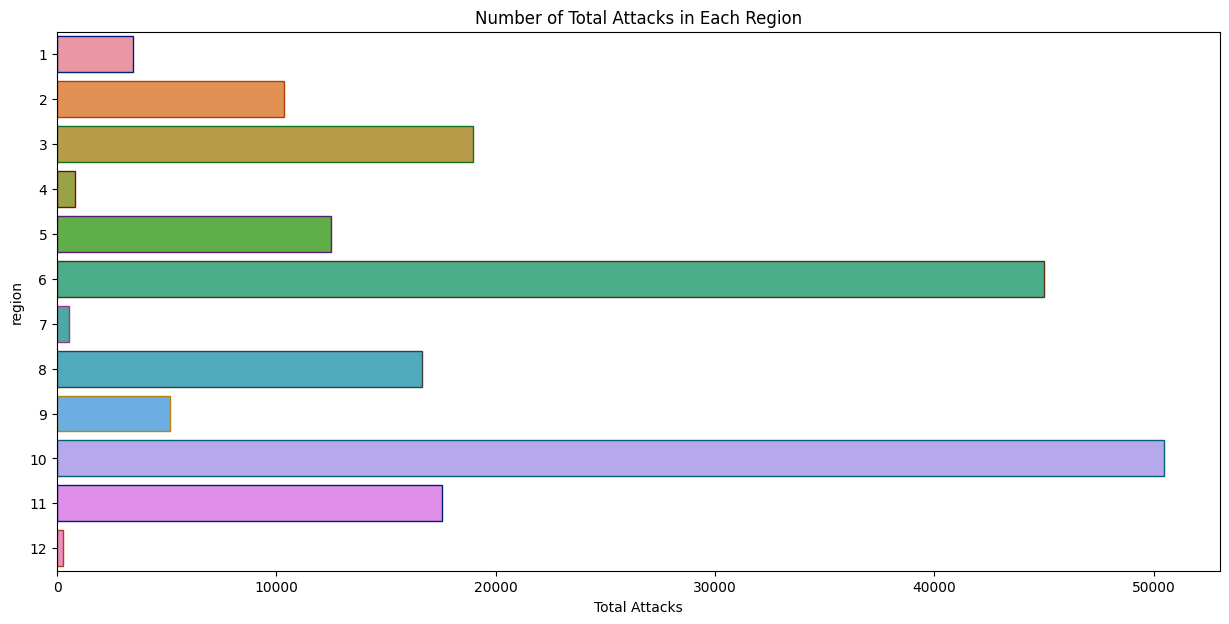

In [105]:
# Region wise attacks

region_attacks= df.region.value_counts().to_frame().reset_index()
region_attacks.columns = ['region', 'Total Attacks']
plt.subplots(figsize=(15,7))
sns.barplot(x=region_attacks['Total Attacks'], y=region_attacks.region, edgecolor=sns.color_palette('dark',10),orient='h')
plt.title('Number of Total Attacks in Each Region')
plt.show()

## Random Forest Model

In [77]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


df = pd.read_csv('archive (4)\globalterrorismdb_0718dist.csv', encoding = 'ISO-8859-1')

features = ['iyear', 'imonth', 'iday', 'country', 'region', 'success', 'suicide', 'attacktype1', 'targtype1']
X = df[features]
y = df['gname'] 

X = X.fillna(X.mean())  

label_encoders = {}
for column in ['country', 'region', 'attacktype1', 'targtype1']:
    label_encoders[column] = LabelEncoder()
    X[column] = label_encoders[column].fit_transform(X[column])

top_n_groups = 10
top_groups = df['gname'].value_counts().nlargest(top_n_groups).index
df_filtered = df[df['gname'].isin(top_groups)]
X_filtered = X[df['gname'].isin(top_groups)]
y_filtered = df_filtered['gname']

# Splitting  dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_filtered, y_filtered, test_size=0.2, random_state=42)
# Creating a Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=42)
# Training  model
model.fit(X_train, y_train)
# Making predictions on the test set
y_pred = model.predict(X_test)
# Evaluating model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
# Displaying results
print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{classification_rep}')


C:\Users\Marwan Fayad\AppData\Roaming\Python\Python37\site-packages\IPython\core\interactiveshell.py:3258: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Accuracy: 0.9017161350764383
Confusion Matrix:
[[  562     1     0     0     0     0     0     0     0    56]
 [    0   431     0     0     0     0     0     0     0    47]
 [    0     0   625     0     0     0     0     0     0    44]
 [    0     0     0   516     0     0     0     0     0    25]
 [    0     0     0     0   762     4     0     0     0   370]
 [    0     0     0     0     0   476     0     0     0    88]
 [    0     0     0     0     0     0   417     1     0    75]
 [    0     0     0     0     0     0     0   883     0    38]
 [    0     0     0     0     0     0     0     0  1140   353]
 [  128   101    29    37   237    72    86    90   426 15363]]
Classification Report:
                                                  precision    recall  f1-score   support

                                      Al-Shabaab       0.81      0.91      0.86       619
                                      Boko Haram       0.81      0.90      0.85       478
Farabundo Marti National Lib

## Linear Regression Model

C:\Users\Marwan Fayad\AppData\Roaming\Python\Python37\site-packages\IPython\core\interactiveshell.py:3258: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Mean Absolute Error: 3.1741175802827697
Mean Squared Error: 133.8319745851461
Root Mean Squared Error: 11.568577033721395
Coefficients: [1.61634702e-08]
Intercept: 2.3893184141091313


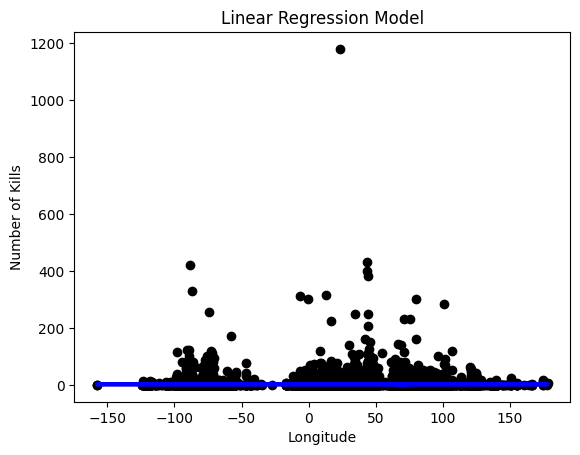

In [121]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

data = pd.read_csv('archive (4)\globalterrorismdb_0718dist.csv', encoding='ISO-8859-1')

X = data[['longitude']]
y = data['nkill']

X = X.replace([np.inf, -np.inf], np.nan)
X = X.dropna()
y = y.replace([np.inf, -np.inf], np.nan)
y = y.dropna()

min_samples = min(X.shape[0], y.shape[0])
X = X[:min_samples]
y = y[:min_samples]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


model = LinearRegression()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)


print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

print('Coefficients:', model.coef_)
print('Intercept:', model.intercept_)

plt.scatter(X_test, y_test, color='black')
plt.plot(X_test, y_pred, color='blue', linewidth=3)
plt.title('Linear Regression Model')
plt.xlabel('Longitude')
plt.ylabel('Number of Kills')
plt.show()


## Clustering

C:\Users\Marwan Fayad\AppData\Roaming\Python\Python37\site-packages\IPython\core\interactiveshell.py:3258: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


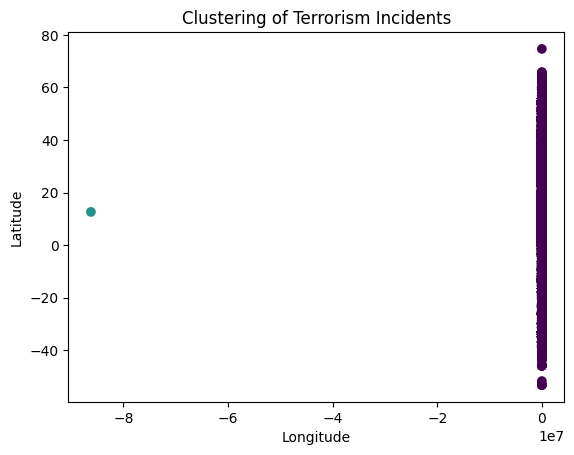

In [122]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Load the dataset
# Assuming your dataset is stored in a CSV file named 'terrorism_data.csv'
df = pd.read_csv('archive (4)\globalterrorismdb_0718dist.csv', encoding='ISO-8859-1')

# Select relevant features for clustering
# You may need to adjust the features based on your specific use case
features = df[['latitude', 'longitude', 'nkill', 'nwound']]

# Handle missing values if any
features = features.fillna(0)

# Standardize the features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Choose the number of clusters (you may need to tune this parameter)
num_clusters = 3

# Apply K-Means clustering
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
df['cluster'] = kmeans.fit_predict(features_scaled)

# Visualize the clusters on a map
plt.scatter(df['longitude'], df['latitude'], c=df['cluster'], cmap='viridis')
plt.title('Clustering of Terrorism Incidents')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()


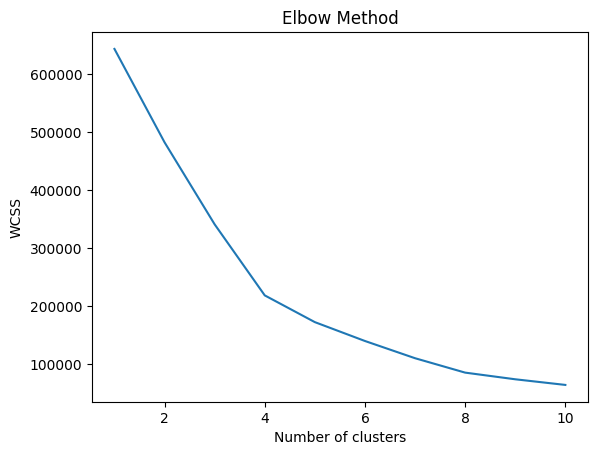

Cluster Centers:
[[ 2.36971402e+01  3.01199894e+01  2.07579251e+00  3.09104920e+00]
 [ 4.06971320e+01 -7.39313510e+01  1.38350000e+03  8.19050000e+03]
 [ 1.26439850e+01 -8.61858960e+07  5.00000000e+00  0.00000000e+00]]


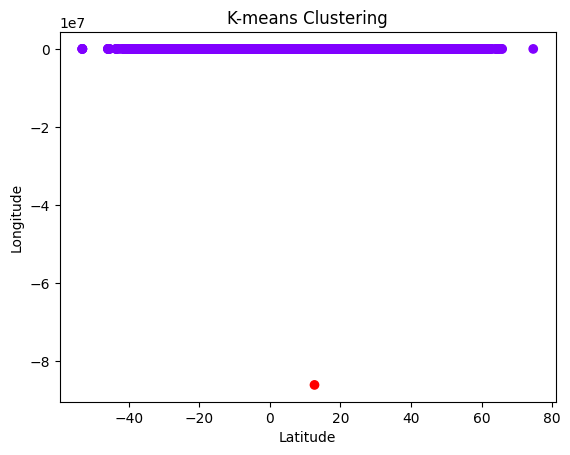

In [128]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Load the dataset
# Assuming your dataset is stored in a CSV file named 'terrorism.csv'
data = pd.read_csv('archive (4)\globalterrorismdb_0718dist.csv', encoding='ISO-8859-1')

# Select relevant columns for clustering
selected_columns = ['latitude', 'longitude', 'nkill', 'nwound']

# Filter the dataset
filtered_data = data[selected_columns]

# Drop rows with missing values
filtered_data = filtered_data.dropna()

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(filtered_data)

# Determine the optimal number of clusters using the Elbow Method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)

# Plot the Elbow Method
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')  # WCSS stands for "Within-Cluster Sum of Squares"
plt.show()

# Choose the optimal number of clusters and perform K-means clustering
optimal_clusters = 3  # Choose based on the Elbow Method plot
kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', max_iter=300, n_init=10, random_state=0)
cluster_labels = kmeans.fit_predict(scaled_data)

# Add cluster labels to the original dataset
filtered_data['Cluster'] = cluster_labels

# Print the cluster centers
print("Cluster Centers:")
print(scaler.inverse_transform(kmeans.cluster_centers_))

# Visualize the clusters (scatter plot of latitude and longitude)
plt.scatter(filtered_data['latitude'], filtered_data['longitude'], c=filtered_data['Cluster'], cmap='rainbow')
plt.title('K-means Clustering')
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.show()


## Logistic Regression Model

C:\Users\Marwan Fayad\AppData\Roaming\Python\Python37\site-packages\IPython\core\interactiveshell.py:3258: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
c:\Users\Marwan Fayad\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


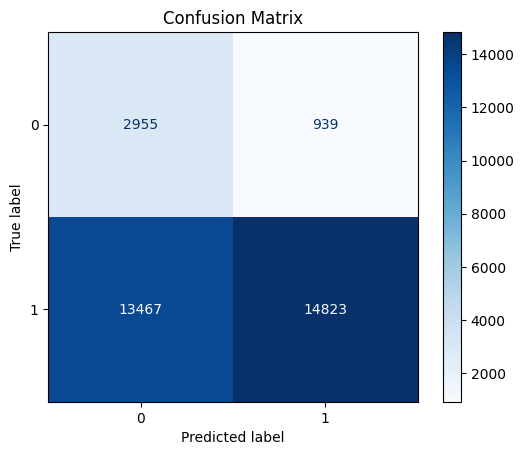

Classification Report:
              precision    recall  f1-score   support

           0       0.18      0.76      0.29      3894
           1       0.94      0.52      0.67     28290

    accuracy                           0.55     32184
   macro avg       0.56      0.64      0.48     32184
weighted avg       0.85      0.55      0.63     32184



In [176]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, classification_report

# Load the dataset
df = pd.read_csv('archive (4)\globalterrorismdb_0718dist.csv', encoding='ISO-8859-1')

# Select different features and target variable
features = ['iyear', 'imonth', 'iday', 'latitude', 'longitude', 'nkill', 'nwound']
target = 'success'  # Assuming 'success' is a binary target variable (1 for success, 0 for failure)

# Filter out rows with missing values in selected features
df = df[features + [target]].dropna()

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df[features], df[target], test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create logistic regression model with balanced class weights
model = LogisticRegression(random_state=42, class_weight='balanced')
model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_scaled)

# Evaluate the model
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plot_confusion_matrix(model, X_test_scaled, y_test, cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred))



## Neural Network

C:\Users\Marwan Fayad\AppData\Roaming\Python\Python37\site-packages\IPython\core\interactiveshell.py:3258: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
c:\Users\Marwan Fayad\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:699: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")
c:\Users\Marwan Fayad\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


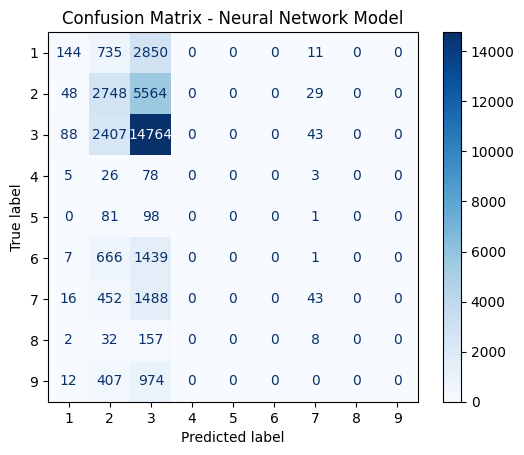

Classification Report:               precision    recall  f1-score   support

           1       0.45      0.04      0.07      3740
           2       0.36      0.33      0.34      8389
           3       0.54      0.85      0.66     17302
           4       0.00      0.00      0.00       112
           5       0.00      0.00      0.00       180
           6       0.00      0.00      0.00      2113
           7       0.31      0.02      0.04      1999
           8       0.00      0.00      0.00       199
           9       0.00      0.00      0.00      1393

    accuracy                           0.50     35427
   macro avg       0.18      0.14      0.12     35427
weighted avg       0.41      0.50      0.41     35427



c:\Users\Marwan Fayad\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Marwan Fayad\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Marwan Fayad\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  

In [178]:

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, plot_confusion_matrix


df = pd.read_csv('archive (4)\globalterrorismdb_0718dist.csv', encoding='ISO-8859-1')


features = ['iyear', 'imonth', 'iday', 'latitude', 'longitude', 'success', 'suicide']
target = 'attacktype1'

# Filter out rows with missing values in selected features
df = df[features + [target]].dropna()

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df[features], df[target], test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create neural network model

model = MLPClassifier(hidden_layer_sizes=(100,), max_iter=500, random_state=42)
model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_scaled)

# Evaluate the model
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plot_confusion_matrix(model, X_test_scaled, y_test, cmap=plt.cm.Blues)
plt.title('Confusion Matrix - Neural Network Model')
plt.show()

# Display the classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report:", class_report)



## SVM Model

C:\Users\Marwan Fayad\AppData\Roaming\Python\Python37\site-packages\IPython\core\interactiveshell.py:3258: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
c:\Users\Marwan Fayad\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


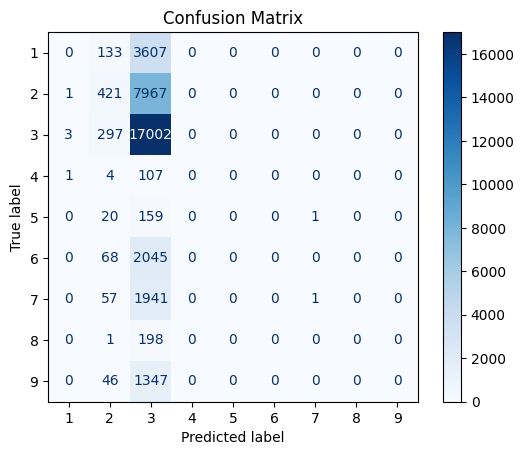

Classification Report:
              precision    recall  f1-score   support

           1       0.00      0.00      0.00      3740
           2       0.40      0.05      0.09      8389
           3       0.49      0.98      0.66     17302
           4       0.00      0.00      0.00       112
           5       0.00      0.00      0.00       180
           6       0.00      0.00      0.00      2113
           7       0.50      0.00      0.00      1999
           8       0.00      0.00      0.00       199
           9       0.00      0.00      0.00      1393

    accuracy                           0.49     35427
   macro avg       0.16      0.11      0.08     35427
weighted avg       0.37      0.49      0.34     35427



c:\Users\Marwan Fayad\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Marwan Fayad\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Marwan Fayad\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  

In [180]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, classification_report

# Load the dataset
df = pd.read_csv('archive (4)/globalterrorismdb_0718dist.csv', encoding='ISO-8859-1')

# Select relevant features and target variable
features = ['iyear', 'imonth', 'iday', 'latitude', 'longitude', 'success', 'suicide']
target = 'attacktype1'

# Filter out rows with missing values in selected features
df = df[features + [target]].dropna()

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df[features], df[target], test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create SVM model
model = SVC(random_state=42)
model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_scaled)

# Evaluate the model
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plot_confusion_matrix(model, X_test_scaled, y_test, cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

# Classification Report
classification_rep = classification_report(y_test, y_pred)
print("Classification Report:")
print(classification_rep)


C:\Users\Marwan Fayad\AppData\Roaming\Python\Python37\site-packages\IPython\core\interactiveshell.py:3258: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
c:\Users\Marwan Fayad\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


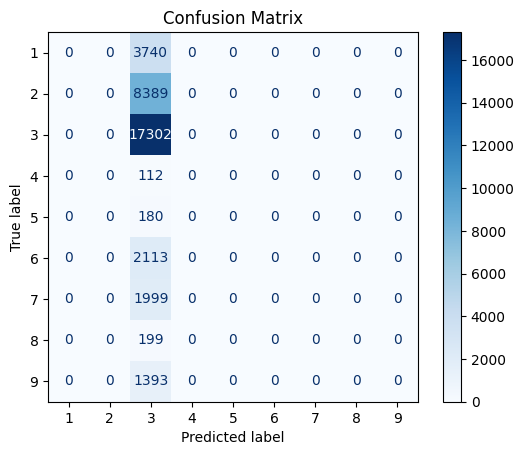

Classification Report:
              precision    recall  f1-score   support

           1       0.00      0.00      0.00      3740
           2       0.00      0.00      0.00      8389
           3       0.49      1.00      0.66     17302
           4       0.00      0.00      0.00       112
           5       0.00      0.00      0.00       180
           6       0.00      0.00      0.00      2113
           7       0.00      0.00      0.00      1999
           8       0.00      0.00      0.00       199
           9       0.00      0.00      0.00      1393

    accuracy                           0.49     35427
   macro avg       0.05      0.11      0.07     35427
weighted avg       0.24      0.49      0.32     35427



c:\Users\Marwan Fayad\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Marwan Fayad\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Marwan Fayad\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  

In [195]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, classification_report

# Load the dataset
df = pd.read_csv('archive (4)/globalterrorismdb_0718dist.csv', encoding='ISO-8859-1')

# Select relevant features and target variable
features = ['iyear', 'imonth', 'iday', 'latitude', 'longitude', 'success', 'suicide']
target = 'attacktype1'

# Filter out rows with missing values in selected features
df = df[features + [target]].dropna()

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df[features], df[target], test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create SVM model with Linear kernel
model = SVC(kernel='linear', random_state=42)
model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_scaled)

# Evaluate the model
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plot_confusion_matrix(model, X_test_scaled, y_test, cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

# Classification Report
classification_rep = classification_report(y_test, y_pred)
print("Classification Report:")
print(classification_rep)
